In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as LinearRegression

## Getting the data

In [8]:
dfx = pd.read_csv('linear_X_Train.csv')
dfy = pd.read_csv('linear_Y_Train.csv')

x = dfx.values
y = dfy.values
print(x)
x = x.reshape((-1,))
y = y.reshape((-1,))
print(x)
print(x.shape)
print(y.shape)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]
[-0.28930742 -0.58880963  1.02750749 ... -0.30516366  1.67583291
 -0.49175724]
(3750,)
(3750,)


## Visualizing the data

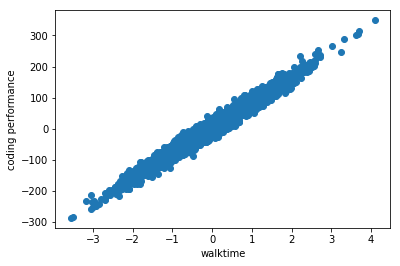

In [9]:
plt.scatter(x,y)
plt.xlabel('walktime')
plt.ylabel('coding performance')
plt.show()

In [16]:
print(x.mean())
print(x.std())

3.789561257387201e-18
1.0


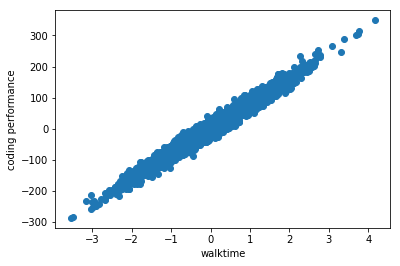

In [15]:
## Now since the mean is 0 (approx) and std is 1, there is no need of normalization, but still for preprocessing
## After Normalization
plt.scatter(x,y)
plt.xlabel('walktime')
plt.ylabel('coding performance')
plt.show()

## Gradient Descent Algorithm

In [20]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.0001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list


In [21]:
final_theta, error_list,theta_list = gradientDescent(x,y)

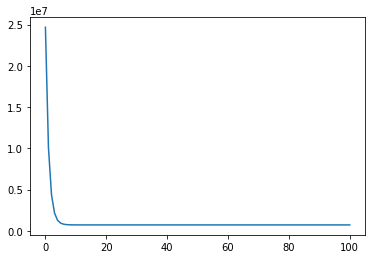

In [22]:
plt.plot(error_list)
plt.show()

In [23]:
print(final_theta)

[ 0.68386897 79.90573694]


## Plotting for the test data

In [24]:
dftest = pd.read_csv('linear_X_Test.csv')
xtest = dftest.values
print(xtest)

[[-1.87794441]
 [-0.86903192]
 [-2.53018242]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]


In [26]:
xtest = xtest.reshape((-1,))

In [27]:
print(xtest)

[-1.87794441 -0.86903192 -2.53018242 ...  0.12800782 -0.27803759
 -0.68042543]


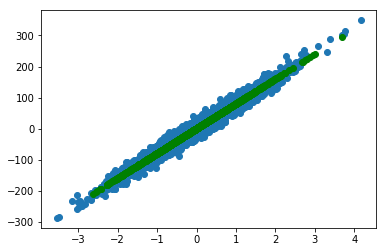

In [30]:
plt.scatter(x,y)
plt.scatter(xtest,hypothesis(xtest,final_theta),color='green')
plt.show()